In [22]:
import localgraphclustering as lgc

import time
import numpy as np

# Import matplotlib 
import matplotlib.pyplot as plt

# Load graph

In [2]:
# Read graph. This also supports gml format.
g = lgc.GraphLocal('datasets/JohnsHopkins.graphml','graphml')

# To get a quick look at the list of methods and attributes for the graph object 'g' you can type 'g.' + tab
# and scroll up or down.

/usr/local/lib/python3.6/site-packages/localgraphclustering/GraphLocal.py:174: UserWarning: Loading a graphml is not efficient, we suggest using an edgelist format for this API.
  warnings.warn("Loading a graphml is not efficient, we suggest using an edgelist format for this API.")


# Nodes embedding via fiedler vector

In [3]:
# Call the global spectral partitioning algorithm.
output_sp = lgc.fiedler(g)
print(output_sp)

[-0.00409879  0.02398684 -0.0072242  ..., -0.00709655 -0.00057053
 -0.00553227]


# Nodes embedding via PageRank vector

In [4]:
ref_node = [3215]
# L1-regularized PageRank solver.
output_acl = lgc.approximate_PageRank(g,ref_node)
print(output_acl)
output_acl = lgc.approximate_PageRank(g,ref_node,cpp = False)
print(output_acl)
output_l1reg = lgc.approximate_PageRank(g,ref_node,method = "l1reg")
print(output_l1reg)
output_l1reg = lgc.approximate_PageRank(g,ref_node,method = "l1reg",cpp = False)
print(output_l1reg)
output_weighted = lgc.approximate_PageRank_weighted(g,ref_node)
print(output_weighted) 

[  1.09052229e-04   2.55015005e-03   4.59018251e-05 ...,   0.00000000e+00
   2.15758562e-05   0.00000000e+00]
[  1.09052229e-04   2.55015005e-03   4.59018251e-05 ...,   0.00000000e+00
   2.15758562e-05   0.00000000e+00]
[  7.97847291e-05   2.53833203e-03   1.80634411e-05 ...,   0.00000000e+00
   1.62294161e-05   0.00000000e+00]
[  7.97847291e-05   2.53833203e-03   1.80634411e-05 ...,   0.00000000e+00
   1.62294161e-05   0.00000000e+00]
Uses the weighted Andersen Chung and Lang (ACL) Algorithm.
[ 0.         0.0018108  0.        ...,  0.         0.         0.       ]


# Rounding algorithms

In [5]:
output_sc = lgc.sweep_cut(g,output_acl,normalized=False)
print(output_sc)
output_sc = lgc.sweep_cut(g,output_l1reg,cpp=False)
print(output_sc)
output_sc = lgc.sweep_cut(g,output_l1reg)
print(output_sc)
output_sc = lgc.sweep_cut(g,output_l1reg,normalized=False)
print(output_sc)

[array([3215, 1496, 4581, ..., 1667, 5128, 3414], dtype=uint32), 0.36393266859654766]
[[3215, 2793, 945, 1972, 454, 1608, 767, 1399, 2991, 2397, 2786, 986, 1952, 4249, 1740, 236, 2865, 4749, 2830, 175, 1625, 5150, 4581, 2406, 1, 4493, 4460, 4920, 992, 4811, 4062, 226, 2803, 3661, 823, 4926, 2689, 4984, 3209, 932, 1929, 1535, 433, 3715, 1496, 1073, 3405, 2033, 1301, 1603, 1980, 170, 4467, 2918, 1865, 4505, 1236, 1044, 670, 1114, 1355, 3791, 3861, 3398, 2105, 2663, 4910, 4346, 4476, 334, 1647, 2638, 2065, 487, 2235, 1116, 3100, 4410, 964, 867, 916, 3892, 2804, 1307, 4649, 1311, 2906, 1194, 3308, 62, 4878, 1567, 2930, 411, 343, 3736, 1212, 3211, 5052, 262, 697, 1938, 2841, 4992, 1097, 725, 1793, 2120, 5144, 2597, 852, 1235, 4178, 2154, 3135, 2773, 2438, 1366, 3478, 1513, 3523, 159, 4384, 2835, 377, 3992, 4922, 2123, 2620, 2775, 4336, 4253, 577, 2330, 64, 542, 77, 4306, 452, 2413, 2750, 2532, 2389, 2678, 576, 2467, 1009, 4033, 1152, 2012, 1861, 3664, 1011, 995, 3869, 2430, 2993, 379, 3599,

# Spectral local graph partitioning methods

In [6]:
ref_node = [3215]

# Find a cluster using approximate PageRank.
output_pr_clustering = lgc.spectral_clustering(g,ref_node,method="acl",iterations=100000)
print(output_pr_clustering)
output_pr_clustering = lgc.spectral_clustering(g,ref_node,method="l1reg")
print(output_pr_clustering)

[array([3215, 2793,  945, ..., 3220, 1886, 4981], dtype=uint32), 0.32491771995840435]
[array([3215, 2793,  945, ..., 3197, 1522, 2256], dtype=uint32), 0.33391259573920318]


# Flow-based local graph partitioning methods

In [7]:
ref_node = [3215]
output_crd = lgc.flow_clustering(g,ref_node,method="crd")
print(output_crd)

[array([4643, 4253,  852, ..., 2801,  282,  575], dtype=uint32), 0.33089236858955701]


In [8]:
G = lgc.GraphLocal('datasets/minnesota.edgelist','edgelist',remove_whitespace=True)
ref_node = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,73,74,75,76,77,78,79,80,81,82,83,84,85,87,88,89,90,91,92,93,94,95,97,98,99,100,102,103,104,105,106,108,112,114,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,139,140,141,142,143,144,145,147,148,149,150,151,152,155,157,158,159,160,161,162,164,165,166,168,169,171,172,173,176,177,178,179,180,185,187,188,191,192,195,196,197,201,208,209,210,211,212,215,217,218,219,221,223,225,226,227,228,231,232,244,245,246,247,248,249,253,254,257,261,262,265,269,270,271,272,273,275,276,277,278,279,285,286,287,290,291,299,303,323,327]
output_mqi = lgc.flow_clustering(G,ref_node,method="mqi")
print(output_mqi)
output_sl = lgc.flow_clustering(G,ref_node,method="sl")
print(output_sl)

[array([195, 192, 191, 188, 187, 180, 178, 177, 176, 171, 169, 164, 158,
       152, 151, 149, 145, 144, 143, 142, 141, 139, 132, 131, 130, 129,
       128, 127, 126, 125, 124, 123, 122, 121, 120, 119, 102, 100,  95,
        94,  93,  92,  91,  90,  89,  88,  85,  84,  83,  82,  81,  80,
        79,  78,  77,  76,  75,  74,  73,  71,  70,  69,  68,  67,  65,
        64,  63,  62,  61,  60,  59, 254,  57, 253,  56,  55,  54,  53,
       249,  52, 248,  51, 247,  50, 246,  49, 245,  48, 244,  47,  46,
        45,  44,  43,  42,  41,  40,  39,  38,  37,  36, 232,  35, 231,
        34,  33,  32, 228,  31, 227,  30, 226,  29, 225,  28,  27, 223,
        26,  25,  24,  23, 219,  22,  21, 217,  20,  19, 215,  18,  17,
        16, 212,  15, 211,  14, 210,  13, 209,  12, 208,  11,  10,   9,
         8,   7,   6,   5,   4,   3,  99,   2,  98,   1,   0], dtype=uint32), 0.036649214659685861]


/usr/local/lib/python3.6/site-packages/localgraphclustering/flow_clustering.py:46: UserWarning: The weights of the graph will be discarded. Use "crd" if you want to keep them.
  warnings.warn("The weights of the graph will be discarded. Use \"crd\" if you want to keep them.")
/usr/local/lib/python3.6/site-packages/localgraphclustering/flow_clustering.py:52: UserWarning: The weights of the graph will be discarded. Use "crd" if you want to keep them.
  warnings.warn("The weights of the graph will be discarded. Use \"crd\" if you want to keep them.")


[array([111, 194, 170, 116, 110, 113, 184, 167,   3,   0,   7,   5,   4,
         9,   2,   8,  13,   6,  14,   1,  17,  12,  18,  11,  20,  23,
        16,  33,  15,  21,  32,  31,  34,  10,  22,  45,  40,  19,  41,
        53,  42,  43,  54,  46,  59,  55,  60,  63,  61,  62,  56,  52,
        39,  71,  70,  73,  75,  74,  65,  77,  69,  79,  57,  78,  76,
        82,  80,  67,  88,  68,  91,  84,  81,  83,  90,  95,  93,  92,
       102, 105, 107, 103, 106, 109, 112, 104, 100,  51, 128,  94, 127,
       130, 131,  98, 139, 123, 141,  99, 114,  89, 144, 142, 155, 160,
       157, 151, 162, 174, 161, 166, 159, 164, 152, 172, 165, 175, 149,
       176, 173, 168, 178, 177, 179, 158, 126, 171, 169, 187, 185, 180,
       191, 209, 211, 208, 192, 210, 132, 215, 201, 221, 188, 217, 195,
       227, 226, 225, 228, 219, 232, 231, 244, 246, 245, 247, 248, 253,
       249, 254, 223, 274, 276, 275, 212, 279, 293, 290, 299, 273]), 0.021479713603818614]


# Example for multiclass label prediction

In [9]:
g = lgc.GraphLocal('datasets/JohnsHopkins.graphml','graphml')

# List of nodes around which we want to find labels
labels = [[1,10,300],[3215],[1002,2500,540]]

output_mc=lgc.multiclass_label_prediction(g,labels=labels)

/usr/local/lib/python3.6/site-packages/localgraphclustering/GraphLocal.py:174: UserWarning: Loading a graphml is not efficient, we suggest using an edgelist format for this API.
  warnings.warn("Loading a graphml is not efficient, we suggest using an edgelist format for this API.")


In [10]:
print(output_mc)

[[array([  1.66015234e-05,   8.88344829e-02,   0.00000000e+00, ...,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00]), array([  7.97847291e-05,   2.53833203e-03,   1.80634411e-05, ...,
         0.00000000e+00,   1.62294161e-05,   0.00000000e+00]), array([  1.55750004e-04,   1.96251451e-04,   0.00000000e+00, ...,
         0.00000000e+00,   1.74754008e-05,   1.65488792e-05])], [array([2236,    0, 3836, ..., 3830, 4599, 5156]), array([ 794,   76, 1843, ..., 3088, 1909, 5156]), array([ 477,  398, 3467, ..., 3468, 1746, 1782])], [2, 0, 1, 2, 1, 2, 2, 2, 1, 0, 0, 2, 0, 1, 2, 1, 1, 0, 2, 2, 0, 1, 1, 2, 1, 1, 1, 0, 1, 2, 2, 0, 2, 0, 0, 1, 0, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 0, 2, 1, 1, 2, 1, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 2, 2, 1, 1, 0, 1, 1, 2, 2, 1, 1, 2, 1, 0, 1, 2, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 2, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 2, 0, 1, 2, 2, 1, 1, 2, 1, 1, 0, 2, 0, 0, 1, 2, 2, 1, 1, 1, 0, 2, 2, 0, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 1

# Densest subgraph 

In [11]:
#How to use densest subgraph method.
g = lgc.GraphLocal('datasets/Erdos02-cc.edgelist','edgelist',' ')
lgc.densest_subgraph(g)

[4.971153846153846,
 array([   3,    4,    5,    7,   27,   30,   33,   37,   45,   54,   57,
          68,   70,   81,  105,  113,  121,  150,  154,  156,  162,  163,
         171,  174,  175,  176,  178,  181,  185,  193,  201,  208,  225,
         244,  248,  252,  255,  256,  259,  262,  265,  266,  269,  272,
         273,  280,  282,  285,  287,  294,  302,  305,  309,  314,  322,
         333,  335,  337,  347,  358,  373,  378,  379,  396,  397,  398,
         405,  406,  411,  416,  425,  433,  435,  449,  452,  454,  457,
         465,  470,  474,  490,  493,  778, 1340, 1489, 2039, 2452, 2797,
        2845, 3392, 3692, 3754, 3760, 4067, 4416, 4795, 4875, 5012, 5060,
        5079, 5170, 5464, 5519, 5533])]

# Network Community Profile

In [19]:
G = lgc.GraphLocal("datasets/neuro-fmri-01.edges","edgelist", " ")
ncp_instance = lgc.NCPData(G)
ncp_instance.crd(ratio=0.5,w=10,U=10,h=1000)
ncp_instance.mqi(ratio=0.5)
ncp_instance.l1reg(ratio=0.5)
ncp_instance.approxPageRank(ratio=0.5)

There are  738  connected components in the graph


/usr/local/lib/python3.6/site-packages/localgraphclustering/GraphLocal.py:367: UserWarning: The graph has multiple (738) components, using the largest with 5725 / 6476 nodes
  self.number_of_components, len(maxccnodes), self._num_vertices))
/usr/local/lib/python3.6/site-packages/localgraphclustering/flow_clustering.py:46: UserWarning: The weights of the graph will be discarded. Use "crd" if you want to keep them.
  warnings.warn("The weights of the graph will be discarded. Use \"crd\" if you want to keep them.")
/usr/local/lib/python3.6/site-packages/localgraphclustering/spectral_clustering.py:92: UserWarning: The weights of the graph will be discarded. Use approximate_PageRank_weighted instead if you want to keep the edge weights.
  warnings.warn("The weights of the graph will be discarded. Use approximate_PageRank_weighted instead if you want to keep the edge weights.")
/usr/local/lib/python3.6/site-packages/localgraphclustering/approximate_PageRank.py:106: UserWarning: The weights o

## Plot NCP with CRD

<class 'localgraphclustering.ncp.NCPData'>


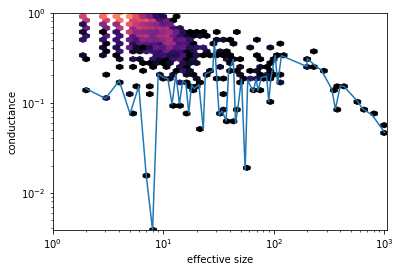

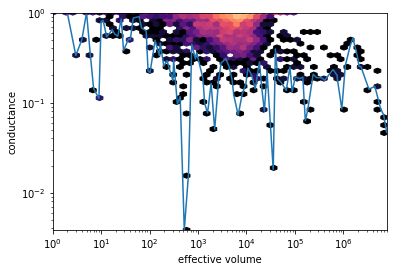

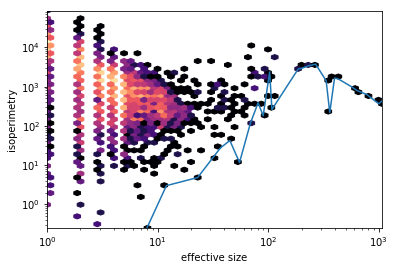

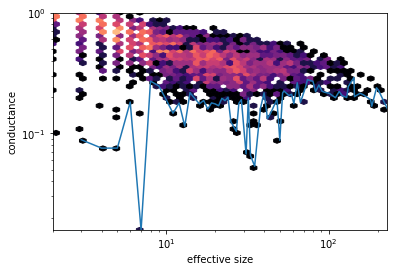

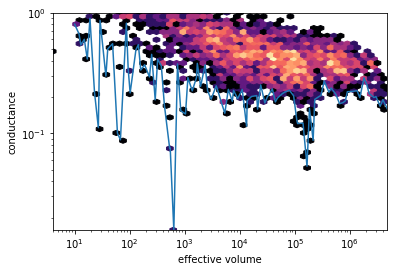

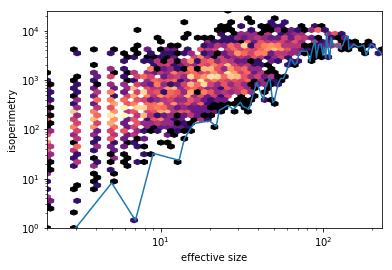

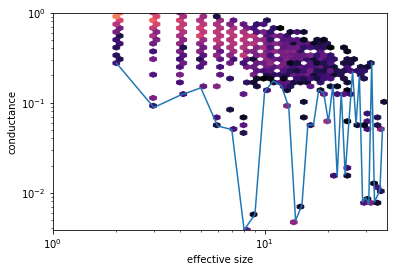

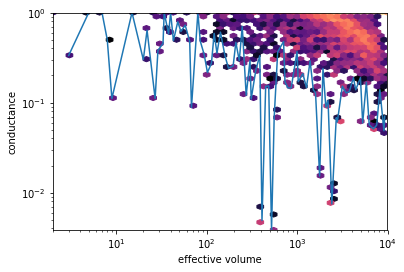

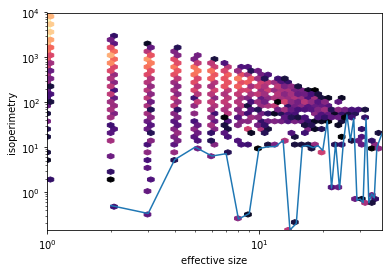

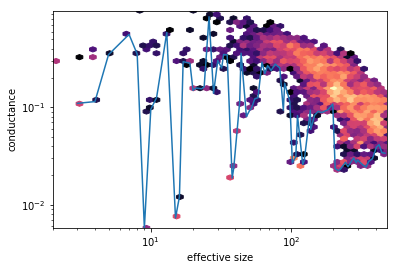

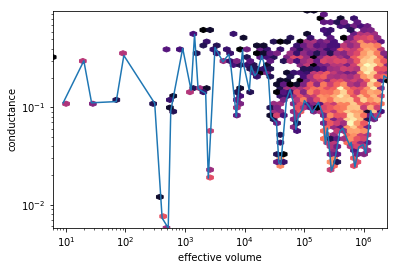

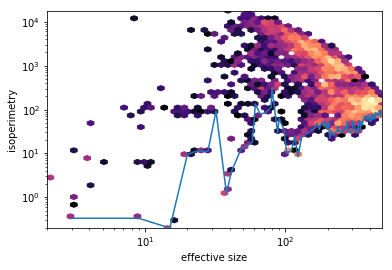

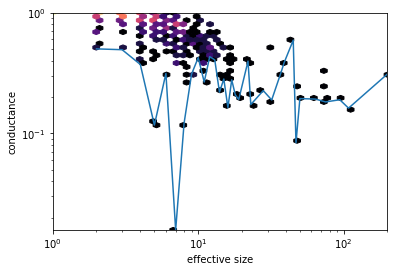

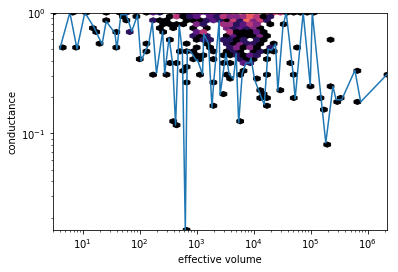

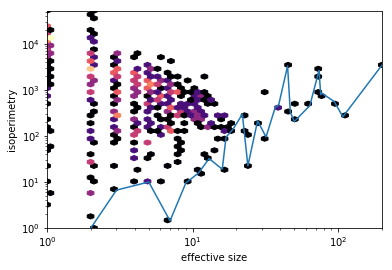

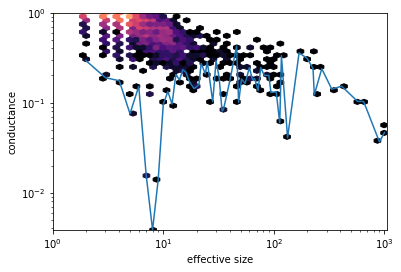

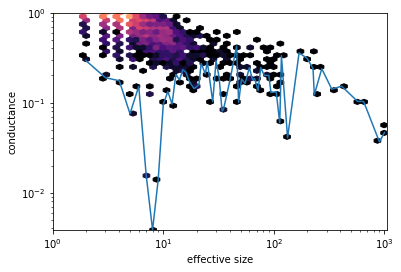

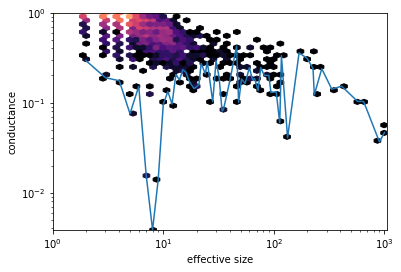

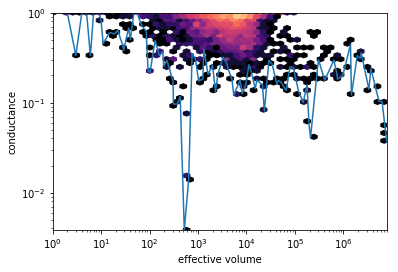

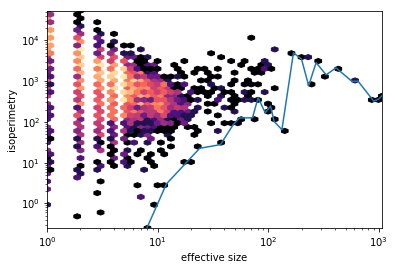

In [23]:
ncp_plots = lgc.NCPPlots(ncp_instance,method_name = "crd")
#plot conductance vs size
fig, ax = ncp_plots.cond_by_size()
plt.show()
#plot conductance vs volume
fig, ax = ncp_plots.cond_by_vol()
plt.show()
#plot isoperimetry vs size
fig, ax = ncp_plots.isop_by_size()
plt.show()

## Plot NCP with MQI

<class 'localgraphclustering.ncp.NCPData'>


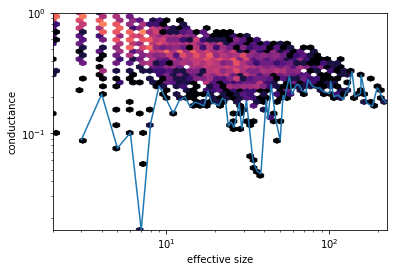

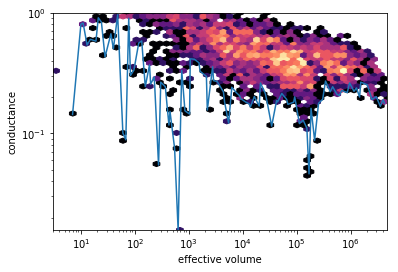

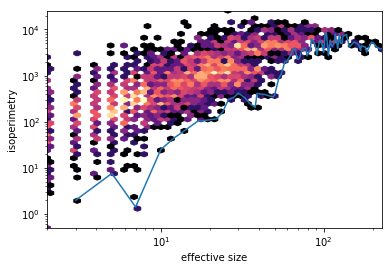

In [24]:
ncp_plots = lgc.NCPPlots(ncp_instance,method_name = "mqi")
#plot conductance vs size
fig, ax = ncp_plots.cond_by_size()
plt.show()
#plot conductance vs volume
fig, ax = ncp_plots.cond_by_vol()
plt.show()
#plot isoperimetry vs size
fig, ax = ncp_plots.isop_by_size()
plt.show()

## Plot NCP with l1reg

<class 'localgraphclustering.ncp.NCPData'>


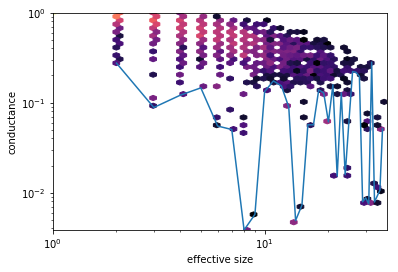

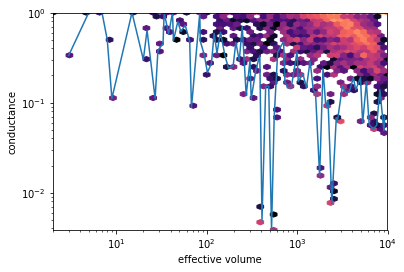

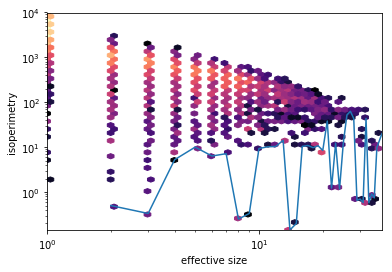

In [25]:
ncp_plots = lgc.NCPPlots(ncp_instance,method_name = "l1reg")
#plot conductance vs size
fig, ax = ncp_plots.cond_by_size()
plt.show()
#plot conductance vs volume
fig, ax = ncp_plots.cond_by_vol()
plt.show()
#plot isoperimetry vs size
fig, ax = ncp_plots.isop_by_size()
plt.show()

## Plot NCP with acl

<class 'localgraphclustering.ncp.NCPData'>


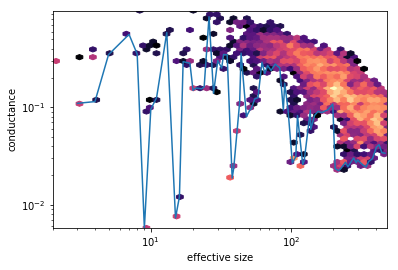

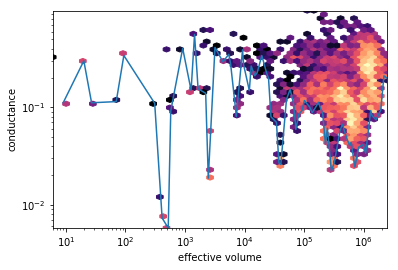

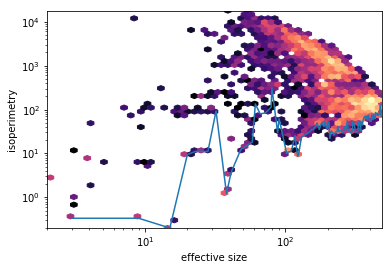

In [26]:
ncp_plots = lgc.NCPPlots(ncp_instance,method_name = "acl")
#plot conductance vs size
fig, ax = ncp_plots.cond_by_size()
plt.show()
#plot conductance vs volume
fig, ax = ncp_plots.cond_by_vol()
plt.show()
#plot isoperimetry vs size
fig, ax = ncp_plots.isop_by_size()
plt.show()

## Plot NCP with selected rows

<class 'localgraphclustering.ncp.NCPData'>


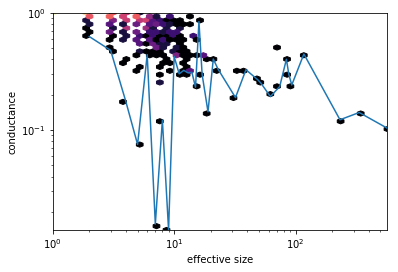

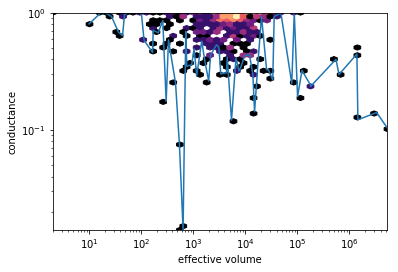

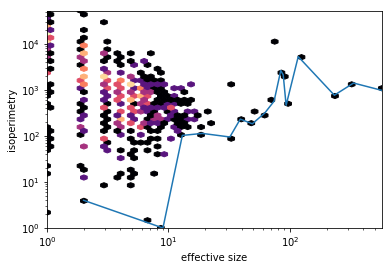

In [27]:
ncp_plots = lgc.NCPPlots(ncp_instance,selected_rows = range(500))
#plot conductance vs size
fig, ax = ncp_plots.cond_by_size()
plt.show()
#plot conductance vs volume
fig, ax = ncp_plots.cond_by_vol()
plt.show()
#plot isoperimetry vs size
fig, ax = ncp_plots.isop_by_size()
plt.show()

In [28]:
ncp_plots = lgc.NCPPlots(ncp_instance,method_name = "faulty_method")

<class 'localgraphclustering.ncp.NCPData'>


Exception: Method name is not available. Options are l1reg;rho=1e-10 acl;rho=1e-05 acl;rho=1e-08 l1reg;rho=1e-07 acl;rho=1e-07 l1reg;rho=1e-04 l1reg;rho=1e-08 l1reg;rho=1e-05 crd mqi acl;rho=1e-10 l1reg;rho=1e-06 acl;rho=1e-06 acl;rho=1e-04 